# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.loc[data['income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.loc[data['income'] == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(n_greater_50k) / n_records * 100.0

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

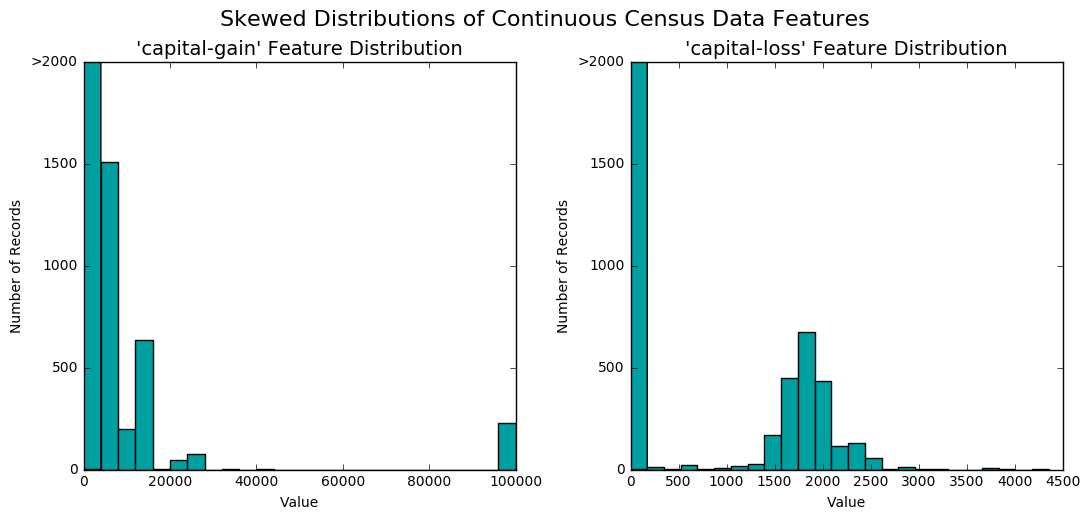

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

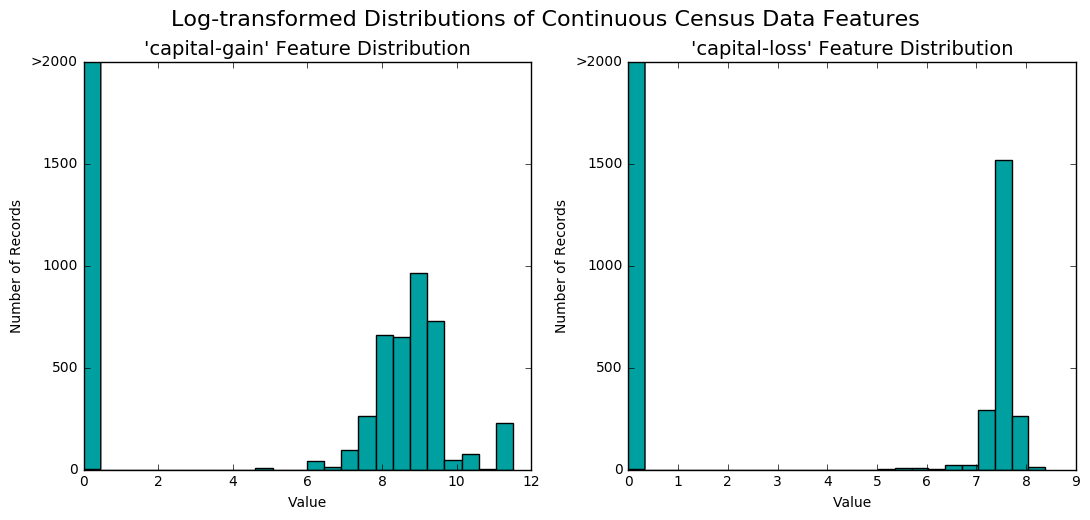

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw, columns='income', drop_first=True).values.ravel()

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [8]:
# TODO: Calculate accuracy
accuracy = greater_percent/100

# TODO: Calculate F-score using the formula above for beta = 0.5
true_pos = float(n_greater_50k)
false_pos = float(n_at_most_50k) 
false_neg = 0.0
beta = .5
precision = true_pos /(true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
fscore = (1.0+beta**2)*precision*recall/((beta**2*precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **
1. Random Forest (RF)
  1. The Random Forest has many real world applications including Fraud Detection and predicting customer attrition.
  2. RF is known to be a robust model that can handle non-linear data and is highly resistant to overfitting. Because RF           is also embarissingly parallel it is a very good for handling vast amounts of data. RF also offers a way to interpret the most important aspects of the data because it gives the feature importances 
  3. RF is not well suited for regression tasks, although it is supported. One reason for this is that RF will not produce predicted values beyond the limits of the training data. It is not sensitive to outliers.
  4. I have chosen RF because I anticipate that the data in this set will be non-linear. The random forest is also well suited to handle the discrete features in the data  <br><br>
  
2. Support Vector Machine (SVM)
  1. SVM are quite often used for cancer research to determine gene expression [Loer][1]
  2. Can produce high high accuaracy on smaller data sets with a large number of features. [Vidhya][2]
  3. Not good for noisy data and requires long training times on large data sets
  4. Given that this is a relatively clean data which does not contain missing values, I believe the SVM may prove to be a competitive model. <br><br>
  
3. Gaussian Naive Bayes (NB)
  1. Often employed for applications such as email filtering and document classification where the amount of data availble for trainig is relatively small and the classes are not very complex.
  2. As a high bias, low variance learner NB is a good starting point for small datasets offering low chance of overfitting. NB also requires little time to train and and generate predictions.
  3. NB is often not complex enough to pick up on certain trends in the data. For example if two features have a similar degree of variance with opposite correlation NB will not be able to distinguish one class from another using these features. [Lavrenko][3]
  4. I chose the Naive Bayes as a replacement for the SVM as it is  well suited for handling a large number of features developed after encoding (from 14 to 103). I also believe it will run much faster.<br><br>
  
4. Logistic Regression 
  1. An invaluable tool for many tasks. Often this is the first model attempted for many ML problems which do not have a large number of predictors. Often used for data sets similar to this one to determine allocation of resources for advertising based on demographic data.
  2. Short training times. In some cases it can also be usefull to know the probabilities of something occurring as well as the predicted outcomes. 
  3. Does not do well with outliers, assumes features are not highly correlated.
  4. Provides a good way to employ a simple model while preserving the flexibility to capture non-linearities. <br><br>

4. Refereneces can be found by following links
  [1]: https://academic.oup.com/nar/article/2999732/Knowledge-about-the-presence-or-absence-of-miRNA
  [2]: https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/
  [3]: https://www.youtube.com/watch?v=feBKiAdhYkc

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    # TODO: Fit the learner to the training data using slicing with 'sample_size'

    start = time() # Get start time
    learner.fit(X_train[0:sample_size], y_train[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    # Look into this one later, not sure if supposed to slice here.
    predictions_train = learner.predict(X_train[0:300])    
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[0:300], predictions_train)
    
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test )
 
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[0:300], predictions_train, .5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, .5, )
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.


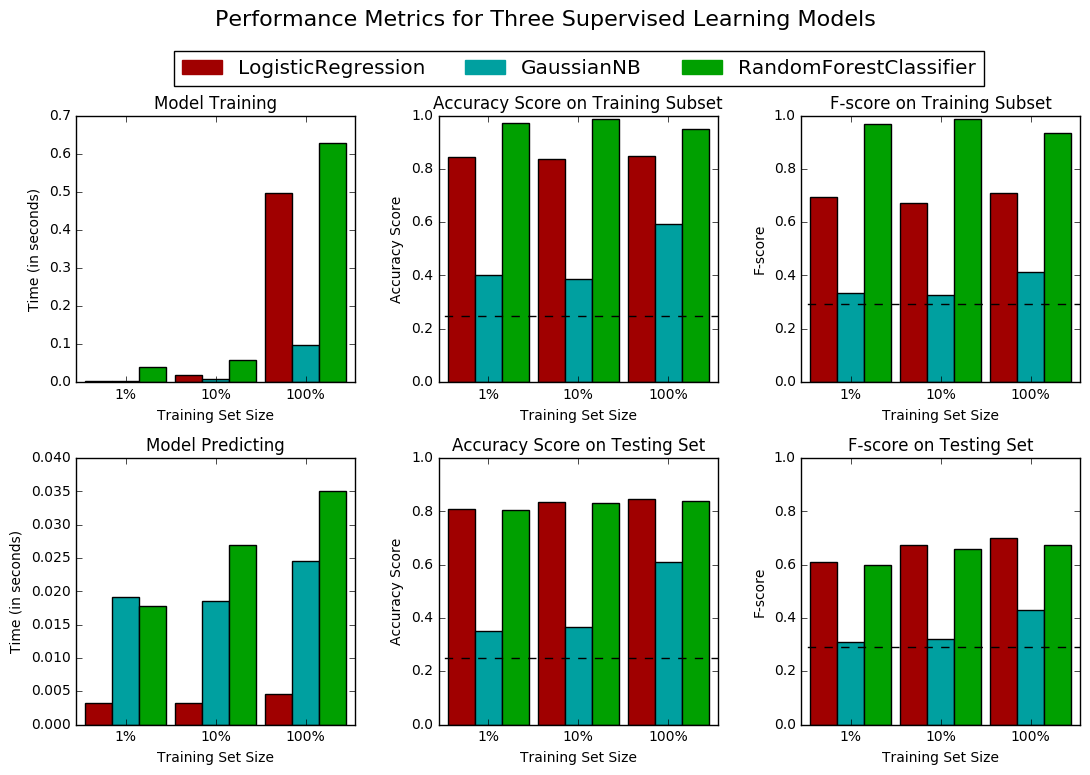

In [15]:
#y_train.values[:,1] -> Identify >50K   : 100% test RF fscore =  
#y_train.values[:,0] -> Identify <50K   

# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors

# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state=5)
clf_B = LogisticRegression(random_state=5)
#clf_B = SVC(random_state=5)
clf_C = GaussianNB()
#clf_C = neighbors.KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
n_train = X_train.shape[0]
samples_1 = int(.01 * n_train)
samples_10 = int(.1 * n_train)
samples_100 = int(n_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}

    for i, samples in enumerate([samples_1, samples_10, samples_100]):      
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [15]:
for key in results.keys():
    print('{0}\n{1}\n '.format(key, pd.DataFrame(results[key])))
    pass
    

LogisticRegression
                   0         1         2
acc_test    0.810835  0.836926  0.848314
acc_train   0.843333  0.836667  0.850000
f_test      0.608164  0.674581  0.699293
f_train     0.694444  0.671642  0.708955
pred_time   0.003276  0.003187  0.005184
train_time  0.002553  0.017307  0.506731
 
GaussianNB
                   0         1         2
acc_test    0.351797  0.367385  0.608292
acc_train   0.400000  0.386667  0.593333
f_test      0.310134  0.320791  0.428113
f_train     0.333333  0.326287  0.412500
pred_time   0.022856  0.022416  0.019712
train_time  0.001662  0.009503  0.089889
 
RandomForestClassifier
                   0         1         2
acc_test    0.807076  0.831177  0.838474
acc_train   0.973333  0.986667  0.950000
f_test      0.597385  0.659635  0.673125
f_train     0.967262  0.988372  0.933544
pred_time   0.022509  0.025141  0.033374
train_time  0.038909  0.066414  0.636379
 


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **
Training time for the 3 models tested above was relatively short, all below 1 second, and therefore was not a significant factor in choosing an algorithm. However, the support vector machine which was initially tested and performed comparable to the random forest, was left out because its training time was more than 2 orders of magnitude larger than the other models. The performance of the Naive Bayes model was significantly lower than the rest. Deciding between the Logistic Regression and Random Forest models was not as straight forward. While the random forest did very well on the training sets, the logistic regression had a slight edge in the Accuaracy and F score testing. Interestingly only the naive Bais showed significant improvement after using more than 10% of the data. 


The model performance improvement compared to the benchmark drops when changing from accuaracy to F-score metric. This is because the F score, which is more sensitive to precision is about 4% higher. The F score metric emphasizes the discrepancy between the training and Testing, particularly for the RF model. For accuaracy all models, inluding the Naive Bayes model were more than 30% above the benchmark while the Naive Bayes showed about 14% improvement for the F-Score. However, improvement for the random Forest and Regression dropped as well for the F-Score benchmark indicating lower precision in these models. The Random Forest exhibited the most discrepency between training and testing, with an F score above 90% on the training data and only 60% for testing. Thus it seems that Naive Bayes and Logistic Regression are both high bias, low variance models which are not able to capture the complexities of the data. In contrast the random forest appears to suffer mostly from over fitting with high training scores and low testing scores. To me this suggests that the random forest has a greater potential if we can reduce over fitting. 

My decision to proceed with Random forest is ultimately based on my belief that it has  more room for improvement. For example it should be relatively straightforward to decrease the gap between training and testing scores in a Random Forest Model, as it is generally true that increasing the number of estimators will decrease overfitting. By default n_estimators = 10. If increasing the n_estimators paramter gives even a modest improvement, the Random forest will likely surpass the Logistic Regression in F score testing. Two other paramters which I believe will yield noticeable results are the maximum depth and the min_samples per split. In contrast to the low hanging fruit of the RF model, I see only the regulariztion parameter 'C', for which the impact on the performance of the Logistic Regression is much less predictable.

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 
The Random Forest Model is a collection of decision trees which are each trained on a sample of the data, referred to as a subsample. Each decision tree is then used to classify whether someone makes more than $50,000 per year or at most 50,000 and falls respectively into the '>50K' or '<=50K' class. The number of predictions falling into each class are then counted for every decision tree in the Random forest. The class with the most votes is the prediction output by the RF classifier for a new data point. 


The subsamples used to train each Decision Tree may contain common data points. Each decision tree is built from the top down by choosing the feature which splits up the data in the the purest subset. This best feature becomes a node and the subsets are split on a that feature forming two child nodes . Each subset is then split again according to the best feature. This process is repeated untill the tree reaches a maximum_depth, maximum number of nodes, all features have been used to split, or some other pre-determined stopping criteria has been reached. 


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [12]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import RandomForestClassifier


# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=5)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[200], 'min_samples_split':[2,3,4,8,10], 'max_depth':range(8, 15)}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8385
F-score on testing data: 0.6731

Optimized Model
------
Final accuracy score on the testing data: 0.8589
Final F-score on the testing data: 0.7334


In [13]:
best_clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       .2478         |       .8385       |      .8589      |
| F-score        |       .2917         |       .6731       |      .7334      |


**Answer: **
The random Forest Model is much better than the Benchmark predictor. The benchmark accuaracy is lower than the F-Score in part because we are seeking to identify the minority class (incomes > $50,000). The  F-0.5 score, which emphasizes precision is less affected by the unbalanced classes. For this reason I take it to be a better measure of model performance on this dataset. One should note however that the choice of metric does not qualitatively change my conclusion about the improvements of the omptimized Random forest model.

A sizeable improvement, about 5.6% in the F-score was also achieved by optimizing the random forest. Most of the improvement was likely due to increasing the number of trees in the random forest, thus reducing overfitting. There were aslo noticeable improvements resulting from extending the maximum depth of the tree to the number of feature variables. 







----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**
Based on my intuition, I would guess the most important features to be:
 1. Capital Gain - I believe that capital gain is directly related to total income. In addition, most of the data for Capital gain is 0. I assume those with a non-zero capital gain own their own business, which is likely a sign of affluence. 
 1. Education Level - Here I make the typical assumption that more educated people generally obtain higher paying jobs.
 1. Native Country - Different countries have different econmic conditions which will have a large impact on an individuals earning potential.
 1. Hours per week - I believe this may help distinguish classes amongst those having the same, or similar occupations
 1. Age - This is likely a weak indicator which provides a means of discretion near the ends of the distrubtion. My belief is that those younger than 25 may not have yet found a high paying career while those older than 65 may be retired and therefore also ear less. 

Mean: 38.55 	 Stdev: 13.22 	 Median: 37.00 	


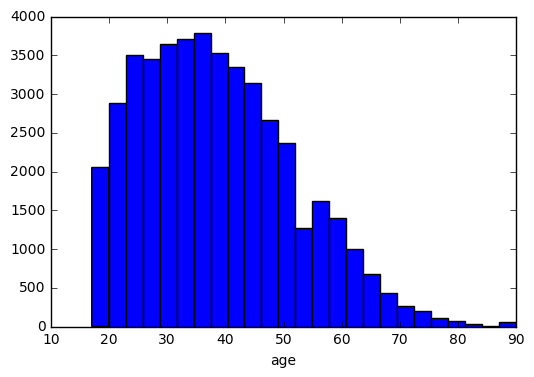

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure();
ax = fig.add_subplot(111);
ax.hist(data['age'], bins=25);
ax.set_xlabel('age');
print('Mean: {0:.2f} \t Stdev: {1:.2f} \t Median: {2:.2f} \t'.format(data['age'].mean(), data['age'].std(), data['age'].median()))


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

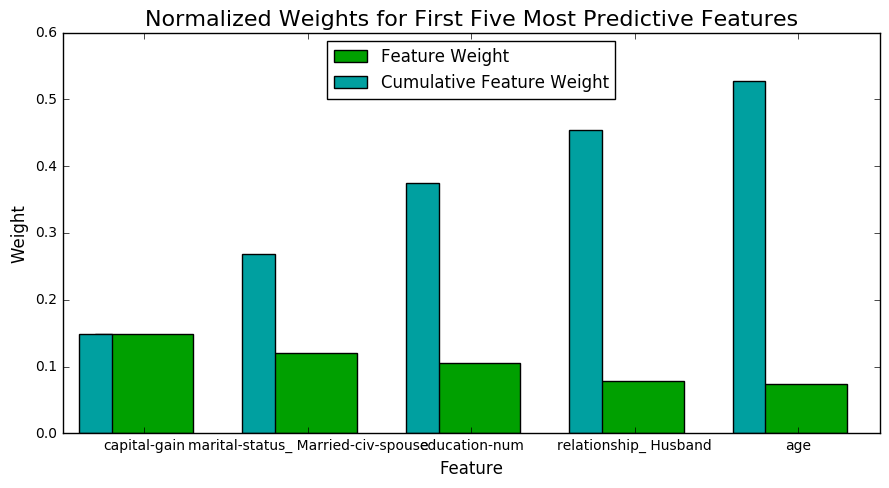

In [43]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = best_clf

# TODO: Extract the feature importances
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:** Three of the features I chose were in the top 5 indicators. The most important indicator by a sizeable margin is capital-gain which, according to the chart, accounts for about 16% of the classification signal. In 5th place is age at about 6%. Interestingly enough the top 5 indicators only account for just over 50% of the discretionary power of the model. Also, as expected education level is fairly significant at about 10%. I believe that both capital gain and education level have a positive correlation with income. I imagine age is likely a non-linear indicator with increasing likelihood of high income toward the middle and then decreasing as age goes up. 

The importance of 'marital-status' and 'relationship_Husband' are fairly surprising. I do not have a real solid explaination for this, but I do suspect the 2 features are highly correlated. It is possible that those with families or who are married feel compelled to take higher paying jobs to support the family and spouse. However a strong argument can likely be made in the opposite direction. In addition, without further analysis it is unclear whether the 'husband' and 'wife' show similar or opposing trends.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [16]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8589
F-score on testing data: 0.7334

Final Model trained on reduced data
------
Accuracy on testing data: 0.8448
F-score on testing data: 0.6902


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**
If I were looking strictly at accuaracy I would say this tradeoff is pretty clear cut, as there is only about a 1.5 percent gain according to this metric. However we are considering more than just the total amount of donations. We would also like to preserve our resources; the time and money spent making calls, and prevent alienating future potential patrons.   

For this reason the change in the fbeta score is given more consideration. Unlike the accuaracy score, the improvement here is more significant at better than 4 percent. However 45% of the remaining signal is distributed across the remaining 98 features. The importance of age imposes an upper limit the importance on those remainng. Finally and most interestingly, notice that there are no sharp jumps in importances for the top 5, it is a rather linear decline. To me this indicates that 1) There is not likely a sharp dropoff of importance in the remaining features.
2) In the best case scenario you would have to atleast double the number of features you looked at to get to even 80 percent. 

In conclusion, if time is a significant factor it would be worth reducing your feature space to the 5 most important features.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.